[View in Colaboratory](https://colab.research.google.com/github/ibacaraujo/fashion_classification/blob/master/fashion_classification.ipynb)

# Fashion Classification

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0-rc1


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# The labels are integers from 0-9 associated with a corresponding clothing
# We store the clothing names in the corresponding index/label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

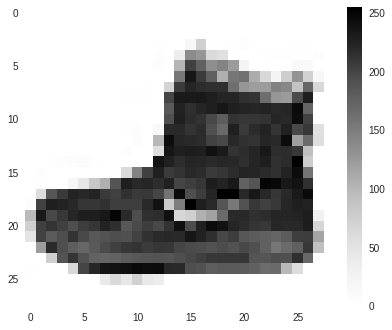

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

The pixel values for the images are in the range of 0 to 255 as we can be observed above. Let's preprocess both training set and testing set to scale the images in the range of 0 to 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and display the class names below each image.

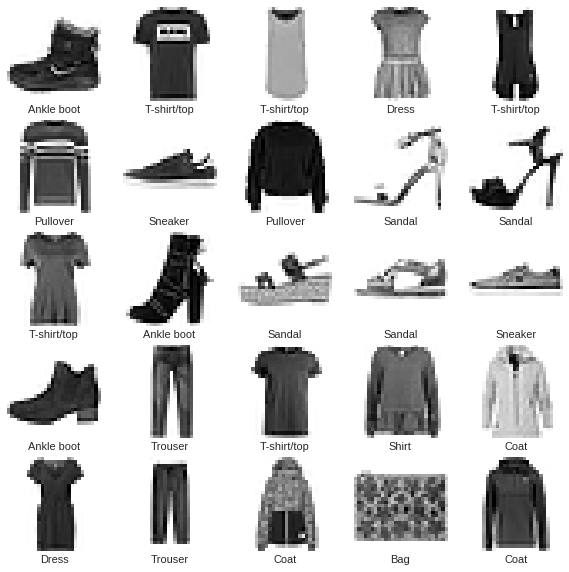

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

## Build the model

This means setting up the layers of the neural network, then compiling the model.

### Setup the layers

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the model requires the following steps:

1. Feed the training data represented by train_images and train_labels arrays
2. The model then learns to associate images and labels
3. We can ask the model to make predictions about a test set - in our case, the test_images array. We compare the predictions with the test_labels array.

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.5046 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3753 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3378 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3125 - acc: 0.8847
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2958 - acc: 0.8910


## Evaluate accuracy

Compare how the model performs on the test set.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/step


In [16]:
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.3561052122354507
Test accuracy:  0.8728


## Make predictions

We can use the model to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Let's take a look at the first prediction

In [18]:
predictions[0]

array([5.32229615e-06, 2.75601431e-10, 3.32425785e-08, 3.32888161e-09,
       1.23146080e-07, 1.25743495e-02, 1.66184691e-07, 9.94814932e-02,
       4.52445875e-06, 8.87933969e-01], dtype=float32)

We can see which label has the highest confidence value

In [19]:
np.argmax(predictions[0])

9

This correspods to a clothing category. We can check at class_names.

In [20]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

Let's check the test label to see if this is correct.

In [21]:
test_labels[0]

9

We can see the name in the same way as with the prediction. We use the corresponding test label as an indice in the class_names list.

In [22]:
class_names[test_labels[0]]

'Ankle boot'

We can graph this to look at the full set of 10 channels.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], \
    img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({}) ".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array

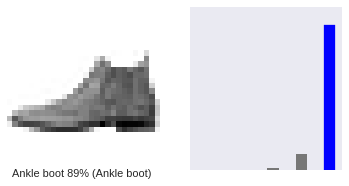

In [24]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

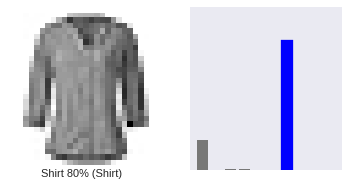

In [25]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

It is really interesting how the neural network model can correctly classify the clothes. Looking at the percentages, we can understand the confidence values in a semantic way. For the ankle boot, the confidence value was 82%. The next label was bag. Despite of the error, the model was not so confident in this. For the shirt case, the next higher confidence value was to the t-shirt/top class. Interesting this, given the visual similarity between both classes.

Let's now plot several images with their predictions. Correct predictions labels are blue and incorrect predict labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

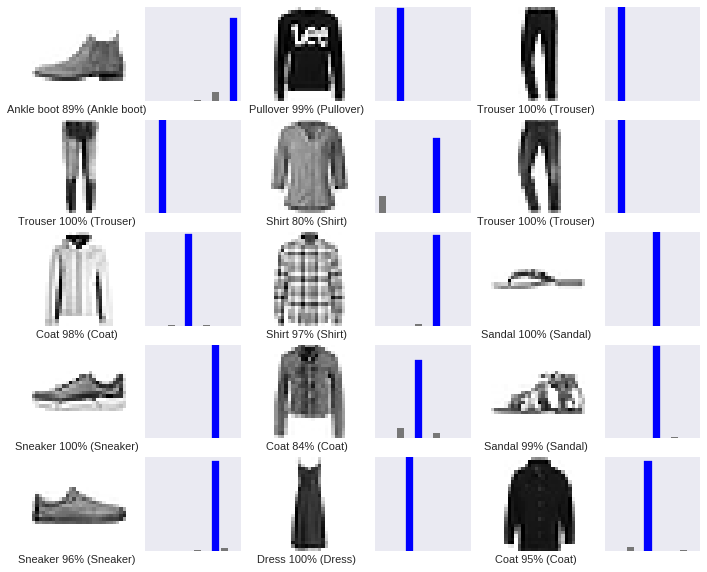

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Finally, use the trained model to make a prediction about a single image.

In [27]:
img = test_images[0]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch because tf.keras is optimized for this.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now, let's predict the image.

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.3223052e-06 2.7560138e-10 3.3242635e-08 3.3288876e-09 1.2314653e-07
  1.2574377e-02 1.6618482e-07 9.9481620e-02 4.5244660e-06 8.8793379e-01]]


Let's plot the figure with these values and indication of the correct prediction in blue.

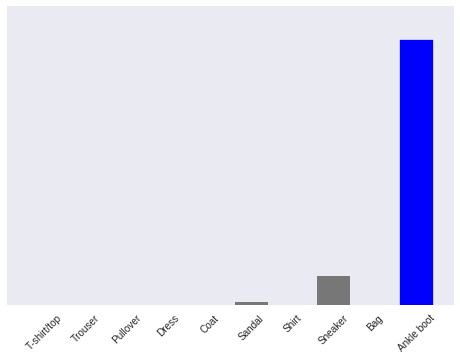

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9

As before, the model predicts a label of 9.

In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
